[[194 194 192 195 193 191 191 190 190 188]
 [192 194 190 194 188 191 189 190 190 190]
 [191 191 191 191 191 190 190 188 189 188]
 [192 192 191 192 190 190 190 190 190 188]
 [192 191 189 190 191 189 189 188 188 189]
 [191 192 189 190 188 188 188 189 188 188]
 [191 191 191 189 191 188 189 188 190 189]
 [191 191 190 190 187 189 187 189 188 190]
 [192 190 189 189 188 188 187 190 189 190]
 [192 190 190 189 188 189 188 188 189 189]]


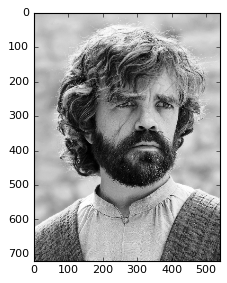

In [1]:
# Read and display an image in opencv
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tyrion_image = cv2.imread('../data/tyrion.jpg', 0)

# Draw the image and show the matrix
print(tyrion_image[:10, :10])
plt.imshow(tyrion_image, 'gray')
plt.show()

('Red ->\n', array([[209, 209, 210, 211, 212, 213, 214, 214, 215, 216],
       [208, 209, 210, 211, 212, 213, 213, 214, 215, 215],
       [208, 208, 209, 210, 211, 212, 212, 213, 214, 214],
       [207, 207, 208, 209, 210, 211, 212, 212, 213, 214],
       [206, 206, 207, 208, 209, 210, 211, 211, 212, 213],
       [208, 208, 209, 210, 211, 212, 213, 213, 214, 215],
       [208, 208, 209, 210, 211, 212, 213, 213, 214, 215],
       [208, 208, 209, 210, 211, 212, 213, 213, 214, 215],
       [207, 208, 209, 210, 211, 212, 212, 213, 214, 214],
       [207, 208, 208, 209, 210, 211, 212, 212, 214, 214]], dtype=uint8))


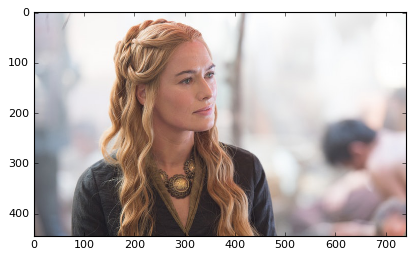

In [2]:
cersei_image = cv2.imread('../data/cersei.jpg')

# Draw the image and show the matrix
print('Red ->\n', cersei_image[:10, :10, 0], )
plt.imshow(cv2.cvtColor(cersei_image, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# Find the average color of the image
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(cersei_image, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[163 166 180]


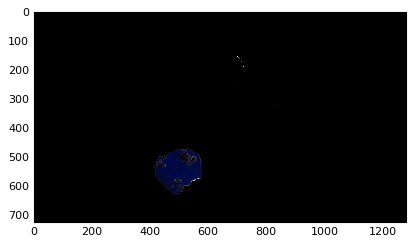

In [4]:
import numpy as np
import cv2
image = cv2.imread('../data/image_processing/color_pallate.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
blue_lower = np.array([110, 0, 0])
blue_upper = np.array([140, 255, 255])
mask = cv2.inRange(image, blue_lower, blue_upper)
res = cv2.bitwise_and(image,image, mask= mask)
res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
plt.imshow(res)
plt.show()

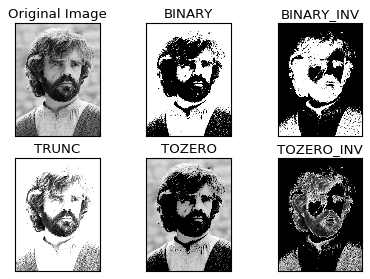

In [5]:
# image thresholding
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = tyrion_image
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

#for img in images:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [6]:
hist_image = cv2.imread('../data/image_processing/histogram.jpg')
hist,bins = np.histogram(hist_image.ravel(),256,[0,256])
print(hist)
print(bins)

[    0     6     0     3     0     0     3     3     6     3    18    21
    24    45    33    72    84   111   117   171   192   180   291   324
   363   396   492   546   603   855   912  1122  1089  1380  1461  1656
  1896  1980  2037  2049  2205  1992  2100  1977  1938  1887  1830  1686
  1803  1854  1659  1827  1770  1698  1689  1647  1776  1785  1833  1938
  1917  2073  2265  2364  2430  2466  2610  2595  2829  2901  2976  3180
  3267  3222  3342  3543  3552  3714  4041  4017  4185  4185  4254  4173
  4299  4206  4134  4209  3981  3966  4143  3876  3726  3819  3690  3840
  3723  3666  3939  3990  4173  4134  4167  4296  4284  4560  4773  4776
  4926  5049  5325  5520  5433  5349  5511  5919  5922  6078  6096  5946
  5961  6015  6153  5958  5769  5610  5817  5673  5277  5409  5157  5088
  4878  4548  4407  4269  4170  4179  4161  4017  3963  3807  3774  3597
  3834  3750  3471  3555  3294  3288  3036  3285  2970  3072  2937  3090
  2766  2583  2577  2604  2340  2418  2313  2304  2

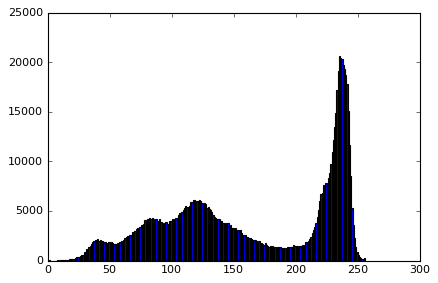

In [7]:
#Plot histogram using matplotlib for a grey scale image
plt.hist(hist_image.ravel(),256,[0,256])
plt.show()

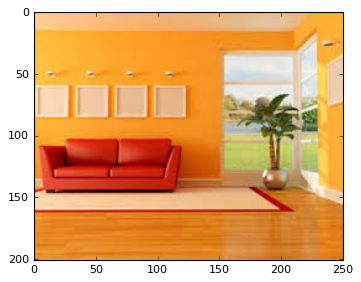

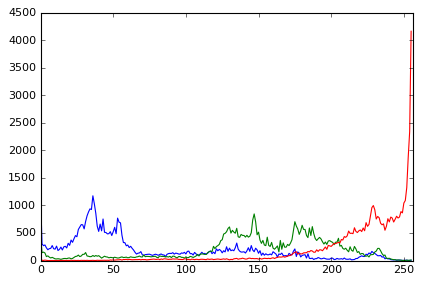

In [8]:
# Plot histogram using matplotlob for color image
hist_image = cv2.imread('../data/image_processing/histogram2.jpeg')
plt.imshow(cv2.cvtColor(hist_image, cv2.COLOR_BGR2RGB))
plt.show()
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([hist_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

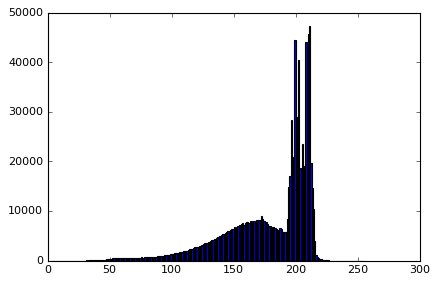

In [9]:
# Histogram equalisation
lw_cntrst_img = cv2.imread('../data/image_processing/low_contrast3.jpg',0)
plt.hist(lw_cntrst_img.ravel(),256,[0,256])
plt.show()

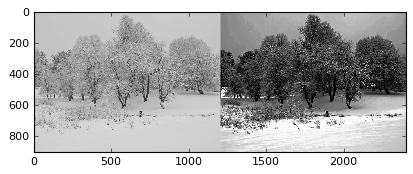

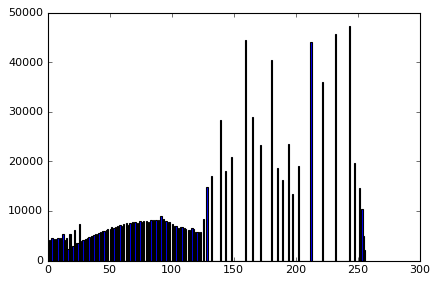

In [10]:
equ = cv2.equalizeHist(lw_cntrst_img)
res = np.hstack((lw_cntrst_img,equ))
plt.imshow(res, 'gray')
plt.show()
plt.hist(equ.ravel(),256,[0,256])
plt.show()

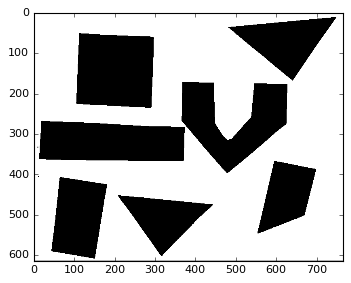

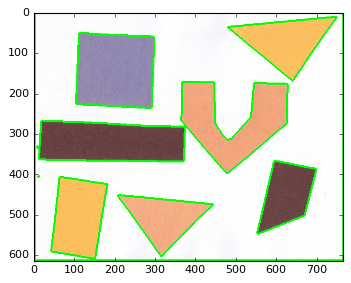

In [11]:
im = cv2.imread('../data/image_processing/shapes.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 220, 255, 0)
plt.imshow(thresh,'gray')
plt.show()
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

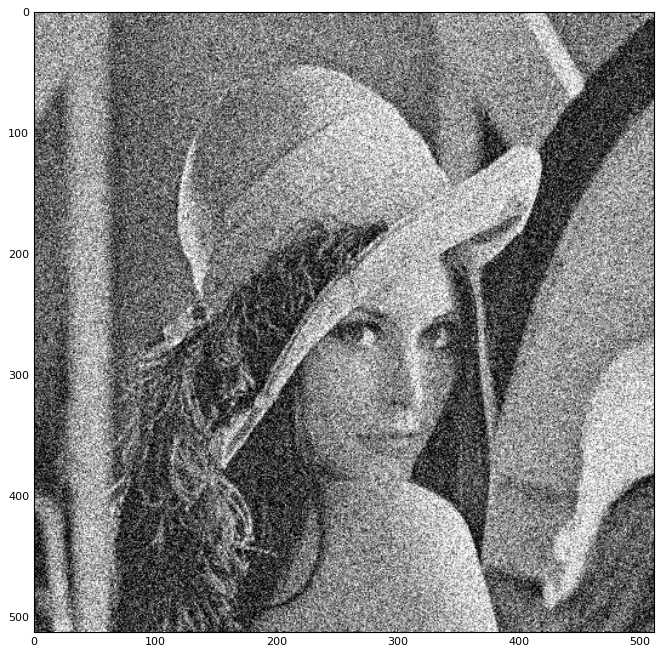

In [12]:

%matplotlib inline

img = cv2.imread('../data/opencv_numpy/lena_noisy.png')
plt.figure(figsize=(10,10))
plt.imshow(img,'gray')

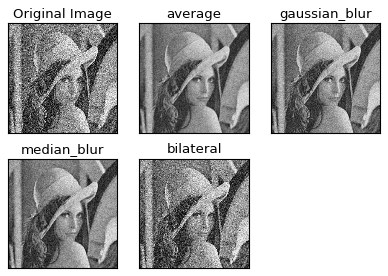

In [13]:
average = cv2.blur(img, (5,5),0)
gaussian_blur = cv2.GaussianBlur(img, (5,5), 0)
median_blur = cv2.medianBlur(img, 5 ,0)
bilateral = cv2.bilateralFilter(img,9,75,75)

titles = ['Original Image','average','gaussian_blur','median_blur','bilateral']
images = [img, average, gaussian_blur, median_blur, bilateral]

#for img in images:
for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

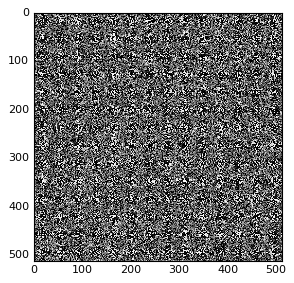

In [14]:
# Detect edges in an image using opencv on the input noisy image
edges = cv2.Canny(img,100,200)
plt.imshow(edges, 'gray')
plt.show()

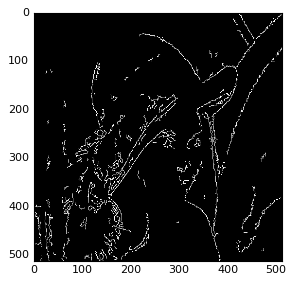

In [15]:
# Detect edges in an image using opencv on the smoothened image
edges = cv2.Canny(average,100,200)

plt.imshow(edges, 'gray')
plt.show()

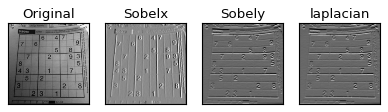

In [16]:
# Laplacian edge detector and sobel gradients
img = cv2.imread('../data/image_processing/gradients.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img,cv2.CV_64F)



plt.subplot(1,4,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobelx'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobely'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(sobely,cmap = 'gray')
plt.title('laplacian'), plt.xticks([]), plt.yticks([])

plt.show()


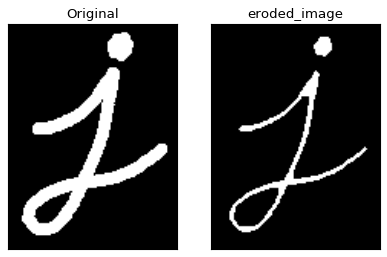

In [17]:
# Now lets do morphological operations
# First lets start with erosion
img1 = cv2.imread('../data/image_processing/j_image.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img1,kernel,iterations = 1)

plt.subplot(1,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(erosion,cmap = 'gray')
plt.title('eroded_image'), plt.xticks([]), plt.yticks([])
plt.show()

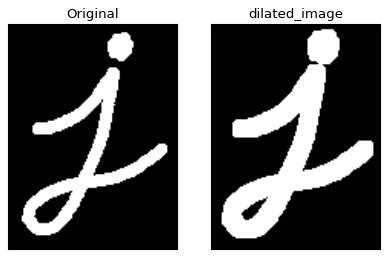

In [18]:
dilation = cv2.dilate(img1,kernel,iterations = 1)

plt.subplot(1,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(dilation,cmap = 'gray')
plt.title('dilated_image'), plt.xticks([]), plt.yticks([])
plt.show()

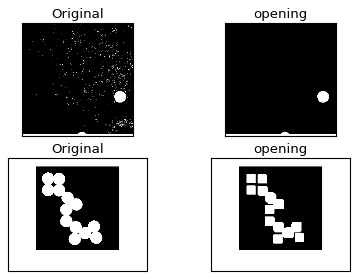

In [19]:
img1 = cv2.imread('../data/image_processing/noisy_img.png',0)
opening1 = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)

img2 = cv2.imread('../data/image_processing/circles.png',0)
opening2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel,iterations = 6)


plt.subplot(2,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(opening1,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img2,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(opening2,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.show()


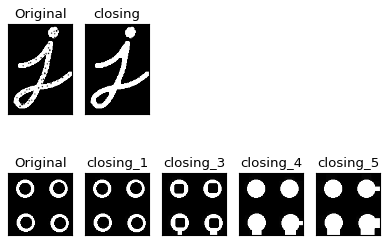

In [20]:
# Now lets try morphological closing

img1 = cv2.imread('../data/image_processing/j_with_holes.png',0)
closing_img1 = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, kernel)

img2 = cv2.imread('../data/image_processing/circle_with_holes.png',0)
closing_img2_iter1 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations = 1)
closing_img2_iter3 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations = 3)
closing_img2_iter4 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations = 4)
closing_img2_iter5 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations = 5)




plt.subplot(2,5,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,2),plt.imshow(closing_img1,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,6),plt.imshow(img2,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,7),plt.imshow(closing_img2_iter1,cmap = 'gray')
plt.title('closing_1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,8),plt.imshow(closing_img2_iter3,cmap = 'gray')
plt.title('closing_3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,9),plt.imshow(closing_img2_iter4,cmap = 'gray')
plt.title('closing_4'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,10),plt.imshow(closing_img2_iter5,cmap = 'gray')
plt.title('closing_5'), plt.xticks([]), plt.yticks([])

plt.show()